# Lab 3 - Neural Networks - Classification

Read about the Dataset - Breast Cancer:
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

### [Optional] if not installed

Install Tensorflow and Keras using the Anaconda Navigator prompt (base root)
- conda install -c conda-forge tensorflow
- conda install -c conda-forge keras

https://anaconda.org/conda-forge/tensorflow

https://anaconda.org/conda-forge/keras


### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

Load Dataset

Hints: 
- from sklearn import datasets
- datasets.load_breast_cancer(return_X_y=True)


In [2]:
from sklearn import datasets

data, target = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

Print the shape of X and y

In [3]:
print(f"X shape: {data.shape}")
print(f"Y shape: {target.shape}")

X shape: (569, 30)
Y shape: (569,)


### Divide the dataset 
use "train_test_split()" with test size 30%

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)

### Neural Network Model

Import Sequential and Dense from Keras

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Create a Sequential model with 1 hidden layer.
- input layer
- hidden layer with 30 neurons - activation RELU
- output layer with 1 neuron - activation sigmoid

In [6]:
model = Sequential()
model.add(Dense(units=30, activation='relu', input_shape=(data.shape[1],)))
model.add(Dense(units=1, activation='sigmoid'))

Compile the model
- optimizer - adam
- loss - binary_crossentropy
- metrics - accuracy

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Print Model summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
- 100 epochs
- batch_size = 50

save the trining process in "history" variable

In [9]:
history = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_test, y_test))

Epoch 1/100
8/8 [==============================] - 0s 12ms/step - loss: 159.5428 - accuracy: 0.3744 - val_loss: 149.7205 - val_accuracy: 0.3684
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 125.6032 - accuracy: 0.3744 - val_loss: 115.0305 - val_accuracy: 0.3684
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 93.5999 - accuracy: 0.3744 - val_loss: 80.6052 - val_accuracy: 0.3684
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 60.6768 - accuracy: 0.3744 - val_loss: 47.4530 - val_accuracy: 0.3684
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 30.3597 - accuracy: 0.3769 - val_loss: 15.0462 - val_accuracy: 0.3743
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 8.4129 - accuracy: 0.4874 - val_loss: 10.7657 - val_accuracy: 0.6433
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 9.1366 - accuracy: 0.6131 - val_loss: 3.1495 - val_accuracy: 0.5088
Epoch 8/100

### Plot the accuracy in a graph along the 50 epochs

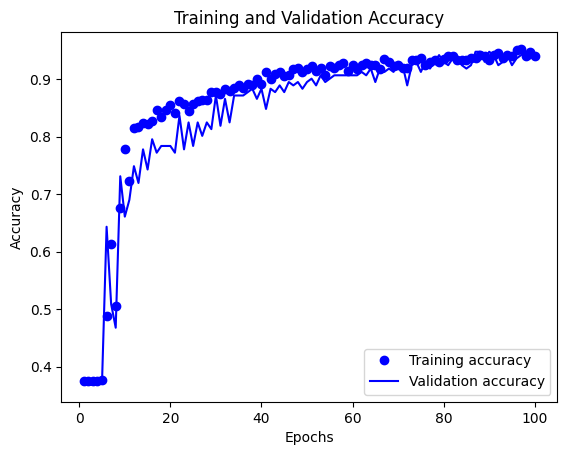

In [10]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model Evaluation
The predictions are in the range between 0 and 1. By default if the value is >0.5  then it is class 1, otherwise it is class 0

In [11]:
pred_test = model.predict(x_test)

6/6 [==============================] - 0s 1ms/step


In [12]:
pred_test[:5]

array([[6.0657996e-01],
       [3.7431312e-01],
       [9.8901403e-01],
       [4.9118971e-04],
       [5.9405103e-02]], dtype=float32)

With these code here, we are converting them to 0 or 1

In [13]:
predictions = (pred_test > 0.5).astype(int)
predictions[:5]

array([[1],
       [0],
       [1],
       [0],
       [0]])

This code gets the "loss" and the "accuracy" on the test set

In [14]:
# evaluate the keras model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy)

0.9415204524993896


### Callbacks
Define 2 callbacks:
- EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
- ModelCheckpoint('best_model2.h5', monitor='loss', verbose=1, save_best_only=True)

and train the model for 100 epochs

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model2.h5', monitor='loss', verbose=1, save_best_only=True)
history = model.fit(
    x_train, y_train, 
    epochs=100, 
    batch_size=50, 
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1390 - accuracy: 0.9400
Epoch 1: loss improved from inf to 0.14667, saving model to best_model2.h5
8/8 [==============================] - 0s 7ms/step - loss: 0.1467 - accuracy: 0.9372 - val_loss: 0.1402 - val_accuracy: 0.9474
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1234 - accuracy: 0.9400
Epoch 2: loss improved from 0.14667 to 0.13927, saving model to best_model2.h5
8/8 [==============================] - 0s 4ms/step - loss: 0.1393 - accuracy: 0.9397 - val_loss: 0.1596 - val_accuracy: 0.9181
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1336 - accuracy: 0.9400
Epoch 3: loss did not improve from 0.13927
8/8 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 0.9296 - val_loss: 0.1389 - val_accuracy: 0.9357
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0647 - accuracy: 0.9800
Epoch 4: loss did not improve from 0.13927
8/8 [==

/Users/hristijanpetreski/Documents/Personal/intelligent-agents/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 9: loss did not improve from 0.13649
8/8 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9447 - val_loss: 0.2194 - val_accuracy: 0.8947
Epoch 10/100
1/8 [==>...........................] - ETA: 0s - loss: 0.4569 - accuracy: 0.8200
Epoch 10: loss did not improve from 0.13649
8/8 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9171 - val_loss: 0.2042 - val_accuracy: 0.8947
Epoch 11/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3414 - accuracy: 0.8400
Epoch 11: loss did not improve from 0.13649
8/8 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9196 - val_loss: 0.1357 - val_accuracy: 0.9357
Epoch 12/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2101 - accuracy: 0.9200
Epoch 12: loss did not improve from 0.13649
8/8 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.9271 - val_loss: 0.1545 - val_accuracy: 0.9240
Epoch 12: early stopping


Load the saved model and evalaute it on the test data and print accuracy

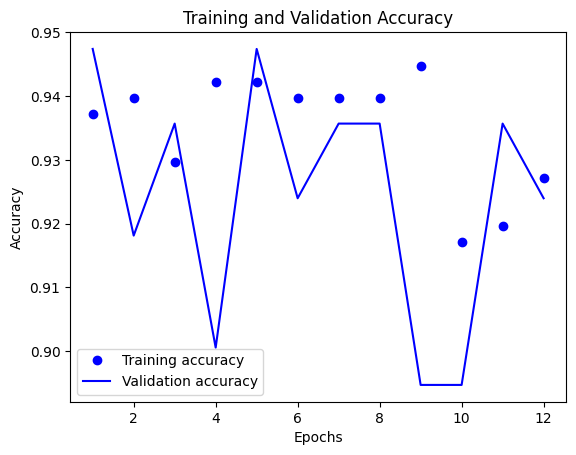

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
pred_test = model.predict(x_test)
predictions = (pred_test > 0.5).astype(int)

6/6 [==============================] - 0s 596us/step


In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy)

0.9239766001701355
